# 3. 顔認識のサンプル

In [1]:
# ライブラリのインポート
import cv2                             # OpenCVライブラリをインポート
import mediapipe as mp                 # MediaPipeライブラリをインポート

## 3-1. モデルの読み込み

In [2]:
# MediaPipeのFace Meshモデルを初期化
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

## 3-2. 画像にランドマークを描画するための初期化

In [3]:
# MediaPipeの描画ユーティリティを初期化
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)  # 描画の設定（線の太さ、円の半径）

## 3-3. 画像の読み込み

In [4]:
# 読み込む画像ファイルのパス
image_path = 'baby.jpg'

# 画像を読み込む
image = cv2.imread(image_path)

## 3-4. RGB形式に変換

In [5]:
# 画像をRGB形式に変換（MediaPipeはBGRではなくRGBで処理する）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## 3-5. 画像を処理

In [6]:
# Face Meshモデルで画像を処理
results = face_mesh.process(image_rgb)

## 3-6. 画像をBGR形式にする

In [7]:
# 画像をBGR形式に戻す（OpenCVの表示に使用）
image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

## 3-7. ランドマークが検出された場所に描画

In [8]:
# 顔のランドマークが検出された場合
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        # 顔のランドマークを描画
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            landmark_drawing_spec=drawing_spec
        )

## 3-8. 画像を表示（matplotlib）

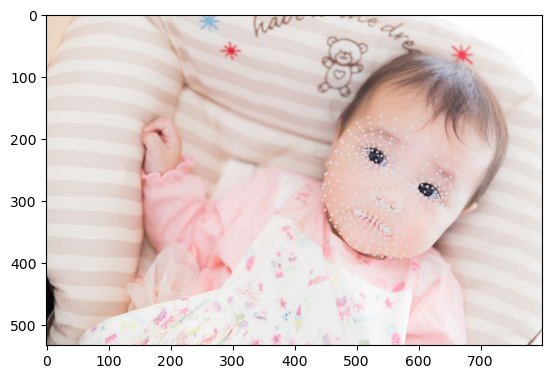

In [9]:
# 画像を表示（OpenCV、別ウインドウ）
cv2.imshow('MediaPipe FaceMesh', image)
cv2.waitKey(0)                   # キーが押されるまでウィンドウを表示
cv2.destroyAllWindows()          # ウィンドウを閉じる
# 画像を表示（matplotlib）
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

## 3-9. ランドマークの番号を表示するサンプル

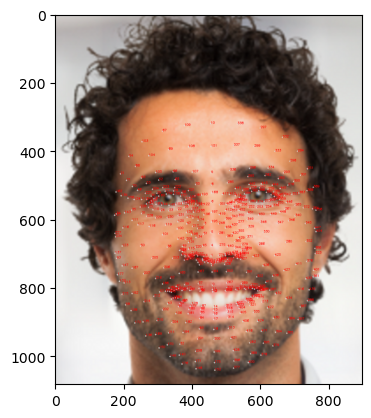

In [10]:
import cv2
import mediapipe as mp

try:
    # MediaPipe Face Meshの初期化
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh()

    # MediaPipe描画ユーティリティの初期化
    mp_drawing = mp.solutions.drawing_utils
    drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

    # 読み込む画像ファイルのパス
    image_path = 'face_sample.png'

    # 画像を読み込む
    image = cv2.imread(image_path)
    if image is None:
        print("Image could not be loaded.")  # 画像が読み込めない場合のエラーメッセージ
    else:

        # イメージをMediaPipeで処理
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image_rgb)

        # イメージをBGRに戻す
        image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

        # 顔のランドマークを描画
        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                mp_drawing.draw_landmarks(
                    image=image,
                    landmark_list=face_landmarks,
                    landmark_drawing_spec=drawing_spec
                )

                # 各ランドマークのインデックスを描画
                for idx, landmark in enumerate(face_landmarks.landmark):
                    ih, iw, _ = image.shape
                    x, y = int(landmark.x * iw), int(landmark.y * ih)
                    cv2.putText(image, str(idx), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)

        # 画像を別ウィンドウに表示する場合（カーネルが再起動する場合にはコメントにする）
        cv2.imshow('MediaPipe FaceMesh', image)
        cv2.waitKey(0)                   # キーが押されるまでウィンドウを表示
        cv2.destroyAllWindows()          # ウィンドウを閉じる

        # plt.imshowで表示する場合
        plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
        plt.show()

        # ファイルを保存しておく
        cv2.imwrite("face_sample_mesh.jpg", image)

except Exception as e:
    print(f"エラーが発生しました: {e}")   # エラーが発生した場合のエラーメッセージ

# 4. 鼻の位置に赤鼻画像を表示させるサンプル

## 4-1. 鼻の上に表示する画像を読み込む（透明度を含め）

In [11]:
# 鼻の上に表示する画像のパスを定義
overlay_image_path = 'red_nose.png'
# 鼻の上に表示する画像を読み込む（透明度も含め）
original_overlay_image = cv2.imread(overlay_image_path, cv2.IMREAD_UNCHANGED)
# original_overlay_image.shape #表示して確認してもよい

## 4-2. 顔を含む画像を読み込んでRGBに変換

In [12]:
# 読み込む画像ファイルのパス
face_image_path = 'face_sample.png'
# 画像を読み込む
face_image = cv2.imread(face_image_path)
# 画像をRGB色空間に変換
face_image_rgb = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)

## 4-3. 顔のランドマークを検出

In [13]:
# 顔のランドマークを検出
results = face_mesh.process(face_image_rgb)

## 4-4. 指定したランドマークの座標を取得する関数

In [14]:
# もし顔が検出されていたら
if results.multi_face_landmarks:
		# 検出された顔の数だけループ
    for face_landmarks in results.multi_face_landmarks:
        # 指定したランドマークの座標を取得する関数を定義
        coords = lambda landmark_id: (int(face_landmarks.landmark[landmark_id].x * face_image.shape[1]), int(face_landmarks.landmark[landmark_id].y * face_image.shape[0]))

In [15]:
# 座標が得られるか確認
coords(4)

(450, 678)

## 4-5. 鼻の座標を取得

In [16]:
# 鼻の座標を取得（IDは具体的に置き換える）
nose = coords(4)  # 4
nose_l = coords(48) # 48あたり？
nose_r = coords(278) # 278あたり？

## 4-6. オーバーレイ画像のサイズを計算し、画像をリサイズ

In [17]:
import numpy as np
# オーバーレイ画像のサイズを計算
overlay_width = int(np.linalg.norm(np.array(nose_r) - np.array(nose_l)))
overlay_height = int(overlay_width * original_overlay_image.shape[0] / original_overlay_image.shape[1])
# オーバーレイ画像をリサイズ
overlay_image_resized = cv2.resize(original_overlay_image, (overlay_width, overlay_height))

## 4-7. オーバーレイ画像の開始と終了座標を計算

In [18]:
# オーバーレイ画像の開始と終了座標を計算（境界を超えないように）
start_x = max(nose[0] - overlay_width // 2, 0)
start_y = max(nose[1] - overlay_height // 2, 0)
end_x = min(start_x + overlay_width, face_image.shape[1])
end_y = min(start_y + overlay_height, face_image.shape[0])

## 4-8. オーバーレイ画像を元の画像上に合成

In [20]:
# アルファ（透明度）と色情報を抽出
overlay_alpha = overlay_image_resized[:, :, 3:] / 255.0 # アルファチャンネル（透明度）を抽出し、255で割って0から1の範囲に正規化
overlay_bgr = overlay_image_resized[:, :, :3]           # BGR色チャンネル（青、緑、赤）を抽出

# オーバーレイ画像を元の画像上に合成
face_image[start_y:end_y, start_x:end_x] = (1.0 - overlay_alpha) * face_image[start_y:end_y, start_x:end_x] + overlay_alpha * overlay_bgr

## 4-9. 画像を表示

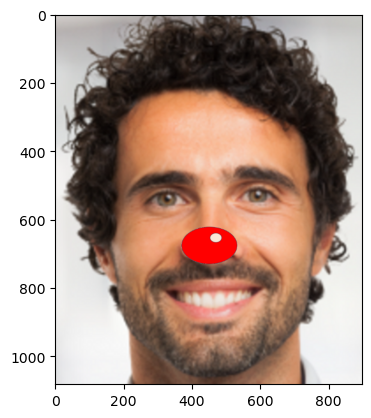

In [21]:
# 画像を表示（cv2.imshowの場合）
cv2.imshow('MediaPipe FaceMesh with Overlay', face_image)
cv2.waitKey(0)                   # キーが押されるまでウィンドウを表示
cv2.destroyAllWindows()          # ウィンドウを閉じる
# 画像を表示（plt.imshowの場合）
plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))
plt.show()